## Impact of covid on prescribing in March

- [Largest absolute increase in items](#abs)
- [Percentage diff of high volume items](#per)
- [Antibiotics](#abx)
- [Overall trends](#overall)

In [1]:
import pandas as pd
import os as os
import numpy as np
from ebmdatalab import bq, maps, charts

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
sql = '''
WITH
  bnf_tab AS (
  SELECT
    DISTINCT chemical,
    chemical_code
  FROM
    ebmdatalab.hscic.bnf )
SELECT
 SUBSTR(presc.bnf_code, 0, 9) AS chemical_code, 
 chemical,
 SUM(case when month = "2019-03-01" then items else 0 END) as items_2019,
 SUM(case when month = "2020-03-01" then items else 0 END) as items_2020
FROM
ebmdatalab.hscic.normalised_prescribing AS presc
LEFT JOIN
bnf_tab
ON
chemical_code=SUBSTR(presc.bnf_code,0,9)
WHERE
month BETWEEN TIMESTAMP('2019-03-01')
 AND TIMESTAMP('2020-03-01') 
GROUP BY
chemical_code,
chemical
ORDER BY
 items_2020 DESC

  '''

df_chemical = bq.cached_read(sql, csv_path=os.path.join('..','data','df_chemical.csv'))
df_chemical.head(5)

,chemical_code,chemical,items_2019,items_2020
0,0212000B0,Atorvastatin,3697616,4382962
1,0602010V0,Levothyroxine sodium,2707630,3050351
2,0103050P0,Omeprazole,2606609,2973978
3,0206020A0,Amlodipine,2509145,2866241
4,0301011R0,Salbutamol,1792093,2776025


In [4]:
df_march_diff = df_chemical.copy()
df_march_diff["increase"] = (df_march_diff.items_2020 - df_march_diff.items_2019).fillna(0)
df_march_diff["per_diff"] = 100*((df_march_diff.items_2020 - df_march_diff.items_2019)/df_march_diff.items_2019)
df_march_diff.head(5)

,chemical_code,chemical,items_2019,items_2020,increase,per_diff
0,0212000B0,Atorvastatin,3697616,4382962,685346,18.53
1,0602010V0,Levothyroxine sodium,2707630,3050351,342721,12.66
2,0103050P0,Omeprazole,2606609,2973978,367369,14.09
3,0206020A0,Amlodipine,2509145,2866241,357096,14.23
4,0301011R0,Salbutamol,1792093,2776025,983932,54.90


## Largest absolute increases in items <a id='abs'></a>

In [5]:
df_march_diff.sort_values("increase", ascending=False).head(26)

,chemical_code,chemical,items_2019,items_2020,increase,per_diff
4,0301011R0,Salbutamol,1792093,2776025,983932,54.90
0,0212000B0,Atorvastatin,3697616,4382962,685346,18.53
14,0302000C0,Beclometasone dipropionate,926886,1429334,502448,54.21
2,0103050P0,Omeprazole,2606609,2973978,367369,14.09
3,0206020A0,Amlodipine,2509145,2866241,357096,14.23
6,0103050L0,Lansoprazole,2168631,2515835,347204,16.01
1,0602010V0,Levothyroxine sodium,2707630,3050351,342721,12.66
5,0205051R0,Ramipril,2416608,2687812,271204,11.22
7,0204000H0,Bisoprolol fumarate,2024810,2278618,253808,12.53
12,0407010H0,Paracetamol,1465480,1708362,242882,16.57


## Percentage difference <a id='per'></a>

In [6]:
high_volume_diff = df_march_diff.loc[(df_march_diff["items_2020"] >= 50000)].sort_values("per_diff", ascending=False)
high_volume_diff.head(26)

,chemical_code,chemical,items_2019,items_2020,increase,per_diff
201,214800001,DUMMY CHEMICAL SUBSTANCE 214800001,16947,74021,57074,336.78
170,0301011AB,Beclometdiprop/formoterol/glycopyrronium,44292,102306,58014,130.98
163,0208020AA,Edoxaban,49447,109435,59988,121.32
4,0301011R0,Salbutamol,1792093,2776025,983932,54.90
129,0601023AN,Empagliflozin,97381,150548,53167,54.60
14,0302000C0,Beclometasone dipropionate,926886,1429334,502448,54.21
109,0302000V0,Fluticasone furoate (Inhalation),125770,190100,64330,51.15
224,0301011V0,Terbutaline sulphate,41821,60974,19153,45.80
200,0301040W0,Umeclidinium bromide/vilanterol,51199,74370,23171,45.26
228,0601023AQ,Dulaglutide,40536,58702,18166,44.81


## Antimicrobial Stewardship <a id='abx'></a>

In [7]:
df_abx_a = df_march_diff[df_march_diff["chemical_code"].str.startswith("050")].sort_values("increase", ascending=False)
df_abx = df_abx_a.loc[(df_abx_a["items_2020"] >= 5)]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df_abx

,chemical_code,chemical,items_2019,items_2020,increase,per_diff
68,0501030I0,Doxycycline hyclate,249319,321744,72425,29.05
27,0501013B0,Amoxicillin,667132,694726,27594,4.14
92,0501011P0,Phenoxymethylpenicillin (Penicillin V),206107,224298,18191,8.83
195,0501050A0,Azithromycin,64255,77958,13703,21.33
108,0501050B0,Clarithromycin,178630,191549,12919,7.23
185,0503021C0,Aciclovir,79217,87733,8516,10.75
378,0501015P0,Pivmecillinam hydrochloride,17535,21850,4315,24.61
333,0504010T0,Quinine bisulfate,24764,28479,3715,15.00
216,0501021L0,Cefalexin,60915,64358,3443,5.65
414,0501080D0,Co-trimoxazole(Trimethoprim/sulfamethoxazole),14131,17483,3352,23.72


## Overall Trends <a id='overall'></a>

In [8]:
sql2 = '''

SELECT
  month,
  SUM(items) AS items,
  SUM(actual_cost) AS cost
FROM
  ebmdatalab.hscic.normalised_prescribing
WHERE
  month BETWEEN TIMESTAMP('2015-01-01')
 AND TIMESTAMP('2020-03-01') #2014 seems to be duplicated so setting argument to eliminate
GROUP BY
  month
ORDER BY
  items DESC

  '''

df_overall = bq.cached_read(sql2, csv_path=os.path.join('..','data','df_overall.csv'))
df_overall.head(5)

,month,items,cost
0,2020-03-01 00:00:00+00:00,99835832,790848491.37
1,2019-10-01 00:00:00+00:00,99722084,758784655.33
2,2018-10-01 00:00:00+00:00,97798558,719422788.30
3,2020-01-01 00:00:00+00:00,96246794,719143800.18
4,2015-12-01 00:00:00+00:00,96043609,761761833.10


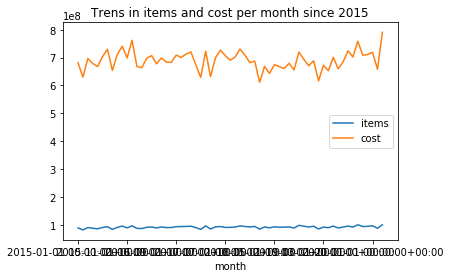

In [9]:
df_overall.groupby("month").sum().plot(kind='line', title="Trens in items and cost per month since 2015")

In [10]:
df_march_2020 = df_overall.loc[(df_overall["month"] == "2020-03-01 00:00:00+00:00")]
df_march_2019 = df_overall.loc[(df_overall["month"] == "2019-03-01 00:00:00+00:00")]

In [11]:
df_march_2020

,month,items,cost
0,2020-03-01 00:00:00+00:00,99835832,790848491.37


In [12]:
df_march_2019

,month,items,cost
33,2019-03-01 00:00:00+00:00,91320874,672356539.25
